# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Inference1= Capomulin is an efective treatment that shows progress when reducing tumor volume
# Inference2= There is a direct correlation between the tumor volume and the mouse's weight. As the weight increases, it nicreases the tumor volume will increase
# Inference3= By observing the Box Plot, we can observe that infubinol and Ceftamin have the greatest tumor volumes 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df=pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview

merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count=merged_df["Mouse ID"].unique()

len(mice_count)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


#method 1
#repeated_value= merged_df.groupby(["Mouse ID","Timepoint"]).size().reset_index(name='Count')
#repeated_value = repeated_value[repeated_value['Count'] > 1]
#print(repeated_value)

#Method 2

repeated=merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
repeated_value=repeated[["Mouse ID","Timepoint"]].values
result = pd.Series(repeated_value.flatten()).unique()

repeated_value



array([['g989', 0],
       ['g989', 0],
       ['g989', 5],
       ['g989', 5],
       ['g989', 10],
       ['g989', 10],
       ['g989', 15],
       ['g989', 15],
       ['g989', 20],
       ['g989', 20]], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
repeated=merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
repeated


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

len(cleaned_df["Mouse ID"].unique())


249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary=pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                      "Median Tumor Volume":median_tumor_volume,
                      "Tumor Volume Variance":tumor_volume_variance,
                      "Tumor Volume Std. Dev.":tumor_volume_std_dev,
                      "Tumor Volume Std. Err.":tumor_volume_std_err
                     })

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
import numpy as np
from scipy.stats import sem


#result = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,sem])

result = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var",sem])
result




# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.393463,50.909965,43.138803,0.525862
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

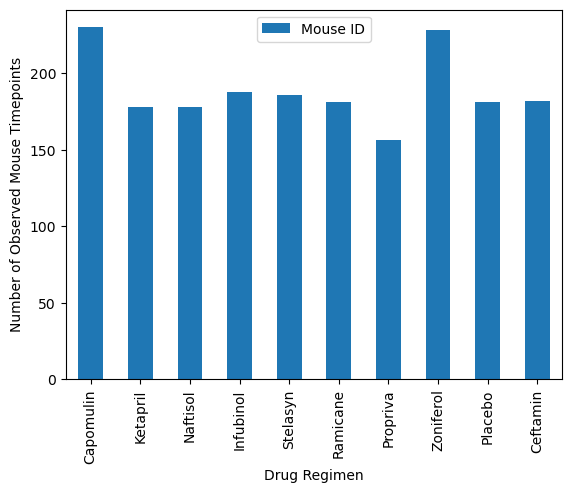

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drugR=cleaned_df["Drug Regimen"].unique()
observations=cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()

dfpandas=pd.DataFrame({"Drug Regimen":drugR,
                 "Mouse ID":observations
                })

dfpandas.plot.bar(x="Drug Regimen",y="Mouse ID")
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()



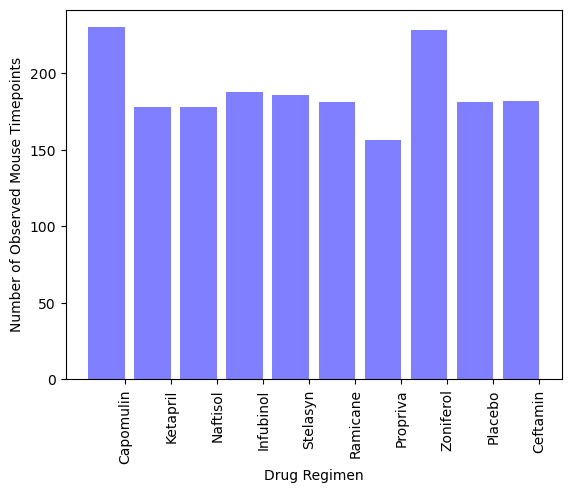

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(cleaned_df["Drug Regimen"].unique()))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, cleaned_df.groupby("Drug Regimen")["Mouse ID"].count(), color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, cleaned_df["Drug Regimen"].unique(), rotation="vertical")


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()

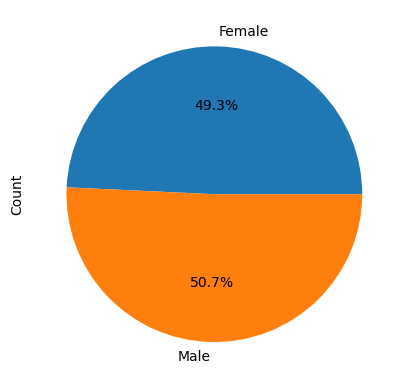

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender=cleaned_df["Sex"].unique()

gender_values=cleaned_df.groupby("Sex")["Mouse ID"].count()

df2pandas=pd.DataFrame({"Mouse Gender":gender,
                        "Count":gender_values
    
})

# Make the pie chart
df2pandas.set_index("Mouse Gender", inplace=True)
df2pandas["Count"].plot.pie(autopct='%1.1f%%')
plt.show()

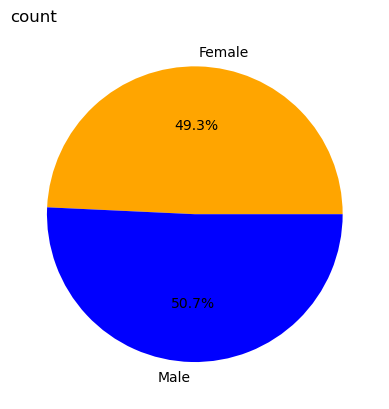

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_values=cleaned_df.groupby("Sex")["Mouse ID"].count()
df3=pd.DataFrame({"Count":gender_values})
df3["Percentage"]=((cleaned_df.groupby("Sex")["Mouse ID"].count())/len(cleaned_df))*100
df3

labels=cleaned_df["Sex"].unique()
sizes=df3["Percentage"]
colors=["orange","blue"]
explode=(0,0)

# Make the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("count",loc="left")
plt.show()




## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment=pd.DataFrame(cleaned_df.groupby("Mouse ID").max()["Timepoint"])
original=cleaned_df.set_index("Mouse ID")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_treatment=pd.merge(treatment, original, on=["Mouse ID","Timepoint"])
merged_treatment.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
labels=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
CapomulinList=[]
RamicaneList=[]
InfubinolList=[]
CeftaminList=[]


#Create a data frame per group
Capomulin=merged_treatment[merged_treatment["Drug Regimen"]=="Capomulin"]
Ramicane=merged_treatment[merged_treatment["Drug Regimen"]=="Ramicane"]
Infubinol=merged_treatment[merged_treatment["Drug Regimen"]=="Infubinol"]
Ceftamin=merged_treatment[merged_treatment["Drug Regimen"]=="Ceftamin"]

for x in Capomulin["Tumor Volume (mm3)"]:
    CapomulinList.append(x)

for x in Ramicane["Tumor Volume (mm3)"]:
    RamicaneList.append(x)

for x in Infubinol["Tumor Volume (mm3)"]:
    InfubinolList.append(x)

for x in Ceftamin["Tumor Volume (mm3)"]:
    CeftaminList.append(x)


for regime in labels:
    x=merged_treatment[merged_treatment["Drug Regimen"]==regime]
    Q1=x["Tumor Volume (mm3)"].quantile(0.25)
    Q3=x["Tumor Volume (mm3)"].quantile(0.75)
    iqr= Q3-Q1
    lower_bound=Q1-(1.5*iqr)
    upper_bound=Q3+(1.5*iqr)
    
    Outlier=x.loc[(x["Tumor Volume (mm3)"]<lower_bound)|(x["Tumor Volume (mm3)"]>upper_bound)]
    result=Outlier["Tumor Volume (mm3)"]

    print(f"{regime}'s potential outliers: {result}")



#Method 2 and test:

#Capomulin----------------------------------------------------

#CapomulinQ1=Capomulin["Tumor Volume (mm3)"].quantile(0.25)
#CapomulinQ3=Capomulin["Tumor Volume (mm3)"].quantile(0.75)
#iqrC= CapomulinQ3-CapomulinQ1
#lower_boundC=CapomulinQ1-(1.5*iqrC)
#upper_boundC=CapomulinQ3+(1.5*iqrC)

#CapoOutlier=Capomulin.loc[(Capomulin["Tumor Volume (mm3)"]<lower_boundC)|(Capomulin["Tumor Volume (mm3)"]>upper_boundC)]
#resultC=CapoOutlier["Tumor Volume (mm3)"]

#Ramicane-------------------------------------------------------

#RamicaneQ1=Ramicane["Tumor Volume (mm3)"].quantile(0.25)
#RamicaneQ3=Ramicane["Tumor Volume (mm3)"].quantile(0.75)
#iqrC= RamicaneQ3-RamicaneQ1
#lower_boundR=RamicaneQ1-(1.5*iqrC)
#upper_boundR=RamicaneQ3+(1.5*iqrC)

#RamiOutlier=Ramicane.loc[(Ramicane["Tumor Volume (mm3)"]<lower_boundR)|(Ramicane["Tumor Volume (mm3)"]>upper_boundR)]
#resultR=RamiOutlier["Tumor Volume (mm3)"]

#Infubinol-------------------------------------------------------

#InfubinolQ1=Infubinol["Tumor Volume (mm3)"].quantile(0.25)
#InfubinolQ3=Infubinol["Tumor Volume (mm3)"].quantile(0.75)
#iqrC= InfubinolQ3-InfubinolQ1
#lower_boundI=InfubinolQ1-(1.5*iqrC)
#upper_boundI=InfubinolQ3+(1.5*iqrC)

#InfuOutlier=Infubinol.loc[(Infubinol["Tumor Volume (mm3)"]<lower_boundI)|(Infubinol["Tumor Volume (mm3)"]>upper_boundI)]
#resultI=InfuOutlier["Tumor Volume (mm3)"]

#Ceftamin----------------------------------------------------------

#CeftaminQ1=Infubinol["Tumor Volume (mm3)"].quantile(0.25)
#CeftaminQ3=Infubinol["Tumor Volume (mm3)"].quantile(0.75)
#iqrC= CeftaminQ3-CeftaminQ1

#lower_boundCe=CeftaminQ1-(1.5*iqrC)
#upper_boundCe=CeftaminQ3+(1.5*iqrC)

#CeOutlier=Ceftamin.loc[(Ceftamin["Tumor Volume (mm3)"]<lower_boundCe)|(Ceftamin["Tumor Volume (mm3)"]>upper_boundCe)]
#resultCe=CeOutlier["Tumor Volume (mm3)"]

#-----------------------------------------------------------------
#print(f"Capomulin's potential outliers: {resultC}")
#print(f"Ramicane's potential outliers: {resultR}")
#print(f"Infubinol's potential outliers: {resultI}")
#print(f"Ceftamin's potential outliers: {resultCe}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


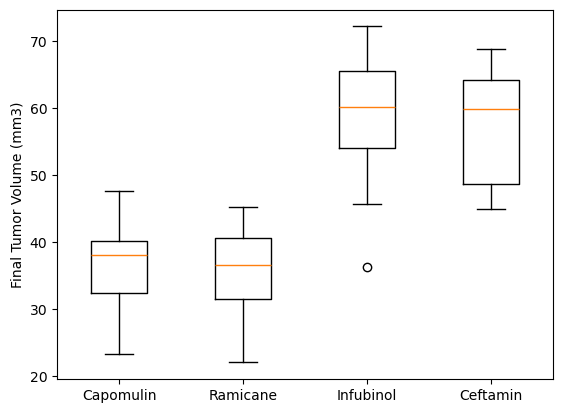

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

data=[CapomulinList,RamicaneList,InfubinolList,CeftaminList]

plt.boxplot(data)
plt.xticks([1,2,3,4],labels)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

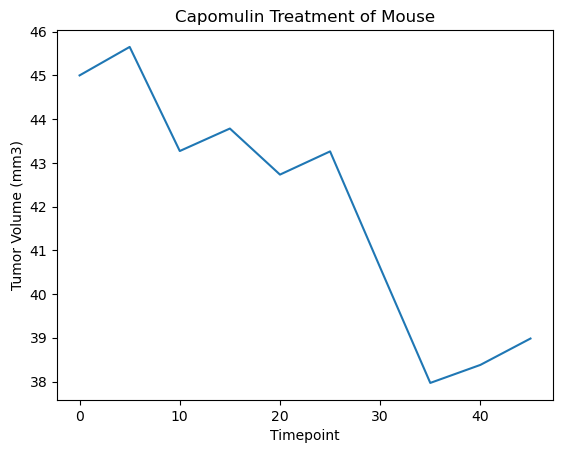

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin=merged_treatment[merged_treatment["Drug Regimen"]=="Capomulin"].reset_index()

mouse=cleaned_df[cleaned_df["Mouse ID"]==Capomulin["Mouse ID"].iloc[0]]

x_axis=mouse["Timepoint"]
y_axis=mouse["Tumor Volume (mm3)"]


plt.plot(x_axis, y_axis)

plt.title("Capomulin Treatment of Mouse")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


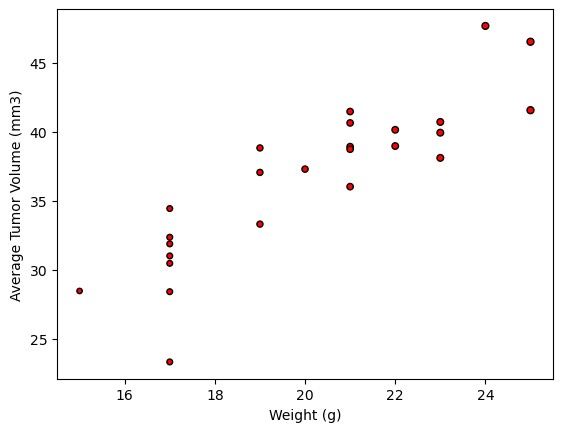

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_axis=Capomulin["Weight (g)"]
y_axis=Capomulin["Tumor Volume (mm3)"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

PearsonRResult(statistic=0.8767060403658116, pvalue=9.084429088673465e-09)


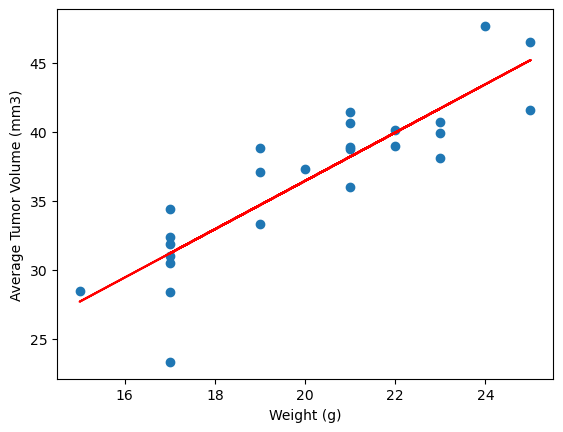

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight=Capomulin["Weight (g)"]
av_tumor=Capomulin["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight,av_tumor)
print(correlation)

x_values = weight
y_values = av_tumor

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope+intercept
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

